<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/w2v_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
df = pd.read_csv(DATA_PATH+"Tweets_nettoyés_210322.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged
0,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,50.0,101.0,98322.0,🚨Le professeur Raoult écope d’un blâme de l’Or...,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...
1,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,643.0,0.0,98322.0,RT @DIVIZIO1: Recours déposé !,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...
2,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,27.0,59.0,98322.0,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...
3,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,14.0,37.0,98322.0,"📚 Jonathan Curiel, directeur général adjoint d...",📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di..."
4,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,39.0,79.0,98322.0,🖍 Le dessin du jour\n&gt; à retrouver sur http...,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...
...,...,...,...,...,...,...,...,...,...,...
722275,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,1.0,1.0,73496.0,@aubreyrumore wikiHow loves you more tho,wikihow loves you more tho,@aubreyrumore_PROPN wikiHow_X loves_X you_X mo...
722276,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,8.0,19.0,73496.0,"""i.e. = """"id est"""" (that is)\ne.g. = """"exempli...",ie id that is eg exempli gratia for the sake o...,"""_PUNCT i.e_NOUN ._PUNCT =_VERB ""_PUNCT ""_PUNC..."
722277,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,84.0,360.0,73496.0,@Thundercat https://t.co/5FYXI3t5Oa,desident_link,@Thundercat_PROPN https://t.co/5FYXI3t5Oa_PROPN
722278,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,2.0,73496.0,"""Throw some D's on that"" - ancient proverb htt...",throw some ds that ancient proverb desident_li...,"""_PUNCT Throw_PROPN some_PROPN D'_ADP s_NOUN o..."


In [ ]:
df = df.dropna()

In [ ]:
df.loc[df['cleaned'].isnull()].head()


,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged


In [ ]:
from nltk import RegexpTokenizer
from nltk.tokenize import word_tokenize


In [ ]:
toknizer = RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')
df['tokenized'] = df['cleaned'].apply(lambda col : toknizer.tokenize(col))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,tokenized
0,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,50.0,101.0,98322.0,🚨Le professeur Raoult écope d’un blâme de l’Or...,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,"[🚨, le, professeur, raoult, écope, ’, un, blâm..."
1,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,643.0,0.0,98322.0,RT @DIVIZIO1: Recours déposé !,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,"[rt, recours, déposé]"
2,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,27.0,59.0,98322.0,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,"[🎙, best, of, pr, michel, drancourt, ihu, épid..."
3,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,14.0,37.0,98322.0,"📚 Jonathan Curiel, directeur général adjoint d...",📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...","[📚, jonathan, curiel, directeur, général, adjo..."
4,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,39.0,79.0,98322.0,🖍 Le dessin du jour\n&gt; à retrouver sur http...,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,"[🖍, dessin, jour, retrouver, desident_link, de..."
...,...,...,...,...,...,...,...,...,...,...,...
722275,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,1.0,1.0,73496.0,@aubreyrumore wikiHow loves you more tho,wikihow loves you more tho,@aubreyrumore_PROPN wikiHow_X loves_X you_X mo...,"[wikihow, loves, you, more, tho]"
722276,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,8.0,19.0,73496.0,"""i.e. = """"id est"""" (that is)\ne.g. = """"exempli...",ie id that is eg exempli gratia for the sake o...,"""_PUNCT i.e_NOUN ._PUNCT =_VERB ""_PUNCT ""_PUNC...","[ie, id, that, is, eg, exempli, gratia, for, t..."
722277,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,84.0,360.0,73496.0,@Thundercat https://t.co/5FYXI3t5Oa,desident_link,@Thundercat_PROPN https://t.co/5FYXI3t5Oa_PROPN,[desident_link]
722278,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,2.0,73496.0,"""Throw some D's on that"" - ancient proverb htt...",throw some ds that ancient proverb desident_li...,"""_PUNCT Throw_PROPN some_PROPN D'_ADP s_NOUN o...","[throw, some, ds, that, ancient, proverb, desi..."


In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [ ]:
model1 = gensim.models.Word2Vec(df['tokenized'], min_count = 50,size = 300, window = 5)

In [ ]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train["sentence"], model)
wv_train_feat.shape

NameError: ignored

In [ ]:
model1.most_similar('trump')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('donald', 0.7086153030395508),
 ('joe', 0.6758384108543396),
 ('obama', 0.6288592219352722),
 ('biden', 0.607581377029419),
 ('démocrates', 0.6024504899978638),
 ('jinping', 0.5882018208503723),
 ('xi', 0.5827274322509766),
 ('mc', 0.5784765481948853),
 ('démocrate', 0.5699114203453064),
 ('ladministration', 0.5674877762794495)]

In [ ]:
model1.most_similar('covid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('covid19', 0.8984169960021973),
 ('coronavirus', 0.7980222702026367),
 ('anticovid', 0.6108226776123047),
 ('virus', 0.5762842893600464),
 ('bronchiolite', 0.5435006618499756),
 ('ebola', 0.5303865671157837),
 ('épidémique', 0.5263282656669617),
 ('delta', 0.5078986883163452),
 ('omicron', 0.5077227354049683),
 ('aviaire', 0.5063372850418091)]

In [ ]:
model2 = gensim.models.Word2Vec(df['parsed'], min_count = 50, size = 100,window = 10, sg = 1)

In [ ]:
model2.most_similar('trump')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('at', 0.9709059596061707),
 ('is', 0.9674904346466064),
 ('us', 0.9616703987121582),
 ('video', 0.9606836438179016),
 ('with', 0.9446921348571777),
 ('amp', 0.9387295246124268),
 ('biden', 0.9372602701187134),
 ('film', 0.9308245182037354),
 ('new', 0.9265515804290771),
 ('jeu', 0.9199531674385071)]

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packa

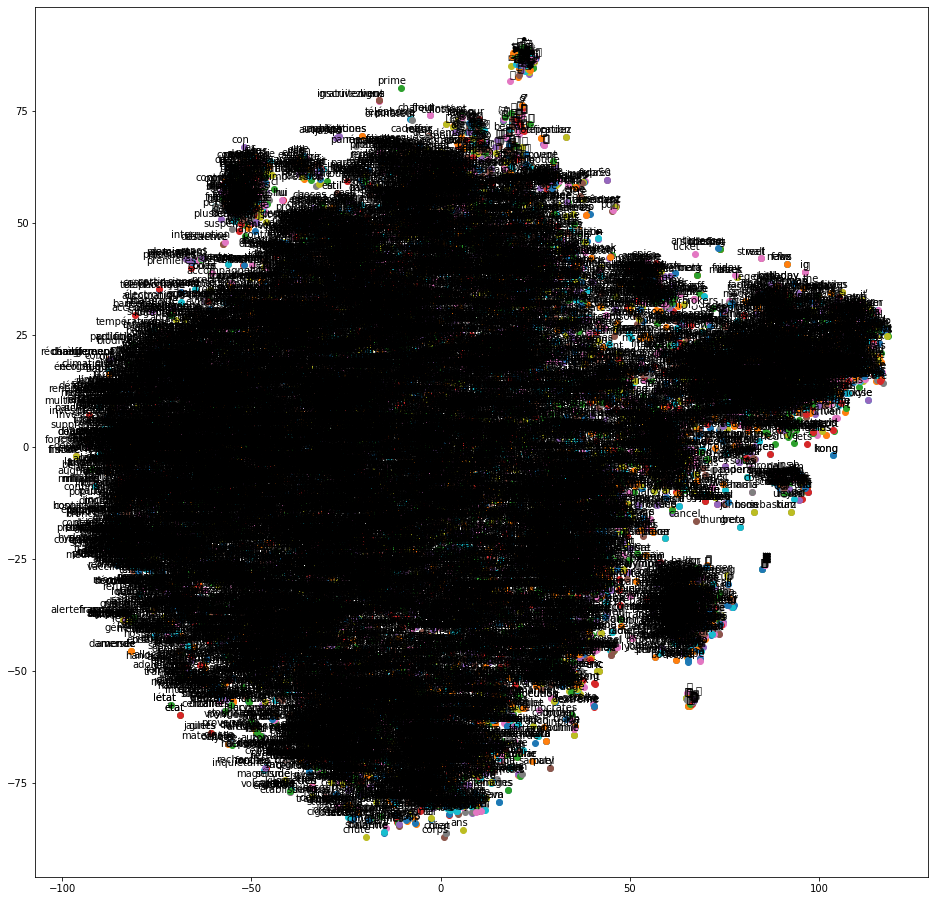

In [ ]:
tsne_plot(model1)